## DoorDash Stock Analysis (Cleaning Version)

Import the basic function package `pandas`, `numpy`, `matplotlib.pyplot` and load the data file `DASH_A1.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DASH_A1.csv")
df

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


## Data Viewing and Preprocessing
For easy reading, change the format of the `Date` and thus can be quickly indexed.

In [3]:
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")
df.set_index("Date", inplace=True)
df


,Close,High,Low,Open,Volume
Date,,,,,
2022-02-24,100.419998,100.919998,85.177002,86.879997,6639000.0
2024-08-01,108.199997,112.769997,105.905998,108.620003,7965400.0
2025-02-11,193.089996,194.000000,189.500000,190.919998,6771900.0
2021-04-13,149.460007,150.360001,143.550003,146.839996,2823500.0
2024-09-17,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...
2024-11-27,178.440002,180.179993,177.699997,179.990005,2031100.0
2025-02-12,200.889999,201.169998,195.197998,198.000000,9989400.0
2025-04-01,182.419998,183.014999,178.259995,182.050003,3740700.0


In [4]:
# Sort the table by date in ascending order
df.index.is_monotonic_increasing # check whether the current data is in the correct order
df.sort_index(inplace=True)  
df


,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [5]:
# check whether there is duplicated data, if so, drop them
df.duplicated().sum() # there are 50 duplicated datas

df.drop_duplicates(inplace=True) 
df

df.duplicated().sum() 


np.int64(0)

In [6]:
# check the total number of missing values in the dataframe for each column 
df.isnull().sum()

Close     23
High      24
Low       15
Open      15
Volume    26
dtype: int64

There are **23** missing value "Close"; **24** missing value "High", **15** missing value "Low", **15** missing value "Open", **26** missing value "Volume".

Then can find out which rows have missing data by using `isnull()`, `any()` along rows.

In [7]:
condition = df.isnull().any(axis=1)
df[condition]

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-17,154.210007,161.660004,NaN,159.100006,6369800.0
2021-01-13,NaN,215.500000,188.070007,192.410004,6058800.0
2021-02-05,NaN,190.916000,180.244995,189.570007,1521400.0
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
...,...,...,...,...,...
2025-04-11,180.490005,NaN,173.809998,178.520004,3451700.0
2025-04-25,187.759995,191.100006,NaN,187.220001,4515100.0
2025-05-01,196.199997,197.750000,NaN,194.404999,4151600.0


## Data Cleaning
Since all 5 columns have some missing values, we then use different approaches to fill the missing values.

### Open Price
Fill missing values in the Open column **with the Close of the day before** as an approximation, ignoring overnight trading.

In [8]:
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df.isnull().sum()

Close     23
High      24
Low       15
Open       0
Volume    26
dtype: int64

### Close Price
Fill missing values in the Close column with the methods **forward-filled** to avoid look-ahead bias.

In [9]:
df['Close'] = df['Close'].ffill()
df.isnull().sum()

Close      0
High      24
Low       15
Open       0
Volume    26
dtype: int64

### High and Low Price
Fill missing values in the High and Low columns **with the mean of the respective High or Low within that month**.

In [10]:
df["Month"] = df.index.to_period("M")
df

df["High"] = df["High"].fillna(df.groupby("Month")["High"].transform("mean"))
df["Low"] = df["Low"].fillna(df.groupby("Month")["Low"].transform("mean"))
df.isnull().sum()

#for col in ["High", "Low"]:
    #for period in df["Month"].unique():
        #mask = df["Month"] == period
        #monthly_mean = df.loc[mask, col].mean()
        #df.loc[mask, col] = df.loc[mask, col].fillna(monthly_mean)


Close      0
High       0
Low        0
Open       0
Volume    26
Month      0
dtype: int64

### Volume (Zero Volume Condition)
**If the Close price is equal to the Open price, fill the missing values in the Volume column with zero**, indicating
no change in trading activity for the day.

In [11]:
condition_equal = (df.Volume.isnull()) & (df.Close == df.Open)
df.loc[condition_equal, "Volume"] = 0

df.isnull().sum()

Close      0
High       0
Low        0
Open       0
Volume    25
Month      0
dtype: int64

### Volume (Non-zero Volume Condition)
**If the Close price is not equal to the Open price, fill the missing values in the Volume column with the median of the existing Volume values**.

In [12]:
condition_notequal = (df['Volume'].isnull()) & (df['Close'] != df['Open']) 
df.loc[condition_notequal, 'Volume'] = df['Volume'].median()

df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Month     0
dtype: int64

In [13]:
df.isnull().sum().sum() # double check there is no missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   Close   1134 non-null   float64  
 1   High    1134 non-null   float64  
 2   Low     1134 non-null   float64  
 3   Open    1134 non-null   float64  
 4   Volume  1134 non-null   float64  
 5   Month   1134 non-null   period[M]
dtypes: float64(5), period[M](1)
memory usage: 62.0 KB


## Feature Engineering 

### Simple Daily Returns
Calculate the simple daily returns to measure the day-to-day percentage change in the Close prices.

In [14]:
df["SimpleDailyReturns"] = df.Close.pct_change()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns
Date,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938
...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165


### Logarithmic Returns
Calculate the logarithmic returns using Close prices.

In [15]:
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns
Date,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521,-0.018695
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140,-0.060961
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714,-0.089612
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938,-0.006962
...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395,-0.004404
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587,-0.011654
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165,0.013079


### 20-Day Momentum
Calculate the 20-day momentum by subtracting the Close price 20 days prior from the current Close price, providing insights into the stock's short-term trend.

In [16]:
df['20Day_Momentum'] = df['Close'] - df['Close'].shift(20)
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum
Date,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521,-0.018695,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140,-0.060961,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714,-0.089612,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938,-0.006962,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395,-0.004404,33.970001
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587,-0.011654,22.869995
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165,0.013079,20.000000


### 20-Day Simple Moving Average
Calculate the 20-day simple moving average to smooth out short-term fluctuations and highlight longer-term trends in the Close prices.

In [17]:
df['20Day_SMA'] = df['Close'].rolling(window=20).mean()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA
Date,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521,-0.018695,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140,-0.060961,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714,-0.089612,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938,-0.006962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395,-0.004404,33.970001,206.409998
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587,-0.011654,22.869995,207.553498
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165,0.013079,20.000000,208.553498


### 20-Day Rolling Volatility
Calculate the 20-day rolling volatility based on the standard deviation of simple daily returns to indicate the stock's risk level.

In [18]:
df['20Day_Volatility'] = df['SimpleDailyReturns'].rolling(window=20).std()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility
Date,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521,-0.018695,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140,-0.060961,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714,-0.089612,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938,-0.006962,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395,-0.004404,33.970001,206.409998,0.017753
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587,-0.011654,22.869995,207.553498,0.015859
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165,0.013079,20.000000,208.553498,0.014953


### Day of the Week
Identify the day of the week for each trading day.

In [19]:
df['Day_of_Week'] = df.index.day_name()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week
Date,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,2020-12,NaN,NaN,NaN,NaN,NaN,Wednesday
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,2020-12,-0.018521,-0.018695,NaN,NaN,NaN,Thursday
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,2020-12,-0.059140,-0.060961,NaN,NaN,NaN,Friday
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,2020-12,-0.085714,-0.089612,NaN,NaN,NaN,Monday
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,2020-12,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,2025-06,-0.004395,-0.004404,33.970001,206.409998,0.017753,Monday
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,2025-06,-0.011587,-0.011654,22.869995,207.553498,0.015859,Tuesday
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,2025-06,0.013165,0.013079,20.000000,208.553498,0.014953,Wednesday


### Price Surge Identification: 
Identify days where the price surged, defined as when the daily return is more than 4 standard deviations above the mean daily return for the period, indicating significant price movements.

In [20]:
# Criteria: Simple Return > Mean + 4 * Std Dev
mean_return = df['SimpleDailyReturns'].mean()
std_return = df['SimpleDailyReturns'].std()
df['Price_Surge'] = df['SimpleDailyReturns'] > (mean_return + 4 * std_return)
df

surge_days = df[df['Price_Surge'] == True]
surge_days

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week,Price_Surge
Date,,,,,,,,,,,,,
2021-01-12,191.990005,201.929993,162.615005,165.500000,7081800.0,2021-01,0.149641,0.139450,16.990005,154.739500,0.056770,Tuesday,True
2021-05-14,141.070007,146.630005,123.570000,125.000000,15264700.0,2021-05,0.221491,0.200072,-8.419998,138.449501,0.065840,Friday,True
2023-11-02,87.790001,90.339996,84.389999,85.089996,12346100.0,2023-11,0.156653,0.145531,13.980003,75.925500,0.045204,Thursday,True


### Volume Spike Identification
Identify days where the volume spiked, defined as when the trading volume is more than 6 standard deviations above the mean volume for the period, highlighting unusual trading activity.

In [21]:
# Criteria: Volume > Mean + 6 * Std Dev
mean_volume = df['Volume'].mean()
std_volume = df['Volume'].std()
df['Volume_Spike'] = df['Volume'] > (mean_volume + 6 * std_volume)

unusualtrading_days = df[df['Volume_Spike'] == True]
unusualtrading_days

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week,Price_Surge,Volume_Spike
Date,,,,,,,,,,,,,,
2022-02-17,105.029999,116.000000,100.529999,115.600998,47405700.0,2022-02,0.106861,0.101528,-21.750000,103.309499,0.070378,Thursday,False,True
2023-12-15,101.570000,103.309998,100.220001,102.739998,30556000.0,2023-12,-0.001867,-0.001869,6.480003,97.266250,0.012769,Friday,False,True
2025-03-21,190.619995,194.399994,187.197006,190.720001,73637400.0,2025-03,-0.011973,-0.012045,-9.320007,189.258000,0.030139,Friday,False,True


### Bollinger Bands Calculation
Calculate the upper and lower Bollinger Bands for the stock, which are set at 2 standard deviations above and below the 20- day simple moving average, to identify overbought and oversold conditions.

In [22]:
df['Upper_BB'] = df['20Day_SMA'] + 2 * df['20Day_Volatility']
df['Lower_BB'] = df['20Day_SMA'] - 2 * df['20Day_Volatility']

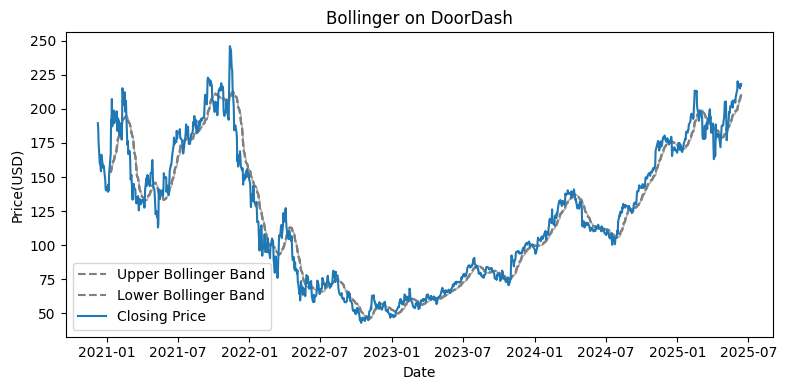

In [23]:
plt.figure(figsize=(8,4))
plt.title("Bollinger on DoorDash")
plt.xlabel("Date")
plt.ylabel("Price(USD)")

plt.plot(df.Upper_BB, label="Upper Bollinger Band", color="grey", linestyle="--")
plt.plot(df.Lower_BB, label="Lower Bollinger Band", color="grey",linestyle="--")
plt.fill_between(df.index, df.Upper_BB, df.Lower_BB, color="grey", alpha=0.5) 
plt.plot(df.Close, label="Closing Price")
plt.legend()
plt.tight_layout()

## Key Dates

PARTS 1, 2, 3

### Highest Volume Day

In [24]:
df['Year'] = df.index.year

unique_years = sorted(df['Year'].unique())
print(f"Unique years in dataset: {unique_years}")
# Years range from 2020 to 2025; we should therefore obtain 6 dates with the date and max volume within each year

# To find the date where the Volume is maximised (for each year)
date_Vol_max = df.groupby('Year')['Volume'].idxmax()

highest_Vol_year = df.loc[date_Vol_max]

print(highest_Vol_year[['Year', 'Volume']])

Unique years in dataset: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
            Year      Volume
Date                        
2020-12-09  2020  25373700.0
2021-03-09  2021  20400000.0
2022-02-17  2022  47405700.0
2023-12-15  2023  30556000.0
2024-05-02  2024  22134800.0
2025-03-21  2025  73637400.0


### Highest High and Lowest Low

The results below illustrate the dates and values of DoorDash's highest and lowest stock prices per year since IPO.

In [25]:
# Highest High (per year)
date_High_max = df.groupby('Year')['High'].idxmax()

# Lowest Low (per year)
date_Low_min = df.groupby('Year')['Low'].idxmin()

highest_high_year = df.loc[date_High_max]
lowest_low_year = df.loc[date_Low_min]

print("Highest High Each Year:")
print(highest_high_year[['Year', 'High']])

print("\nLowest Low Each Year:")
print(lowest_low_year[['Year', 'Low']])

Highest High Each Year:
            Year        High
Date                        
2020-12-09  2020  195.500000
2021-11-15  2021  257.250000
2022-01-12  2022  152.494995
2023-12-11  2023  103.980003
2024-12-17  2024  181.779999
2025-06-06  2025  220.880005

Lowest Low Each Year:
            Year         Low
Date                        
2020-12-31  2020  135.380005
2021-05-13  2021  110.129997
2022-10-24  2022   41.365002
2023-01-06  2023   45.931999
2024-01-04  2024   93.330002
2025-04-07  2025  155.399994


### Annual Open and Close

The results below show DoorDash's opening (at the start of each year) and close prices (at the end of each year).


Including the exact date is optional as the *Open* must be the first trading day of the year (e.g., 2nd Jan), and the *Close* must be the last trading day.

In [26]:
date_Open_first = df.groupby('Year').head(1).index
date_Close_last = df.groupby('Year').tail(1).index

annual_open = df.loc[date_Open_first, ['Year', 'Open']]
annual_close = df.loc[date_Close_last, ['Year', 'Close']]

print("Annual Open Prices:")
print(annual_open.to_string(index = False))

print("\nAnnual Close Prices:")
print(annual_close.to_string(index = False))

Annual Open Prices:
 Year       Open
 2020 182.000000
 2021 142.500000
 2022 149.610001
 2023  49.980000
 2024  97.800003
 2025 168.789993

Annual Close Prices:
 Year      Close
 2020 142.750000
 2021 148.899994
 2022  48.820000
 2023  98.889999
 2024 167.750000
 2025 218.119995


## Data Visualisation

### Line Trend Chart
**Close Price with SMA and Bollinger Bands**

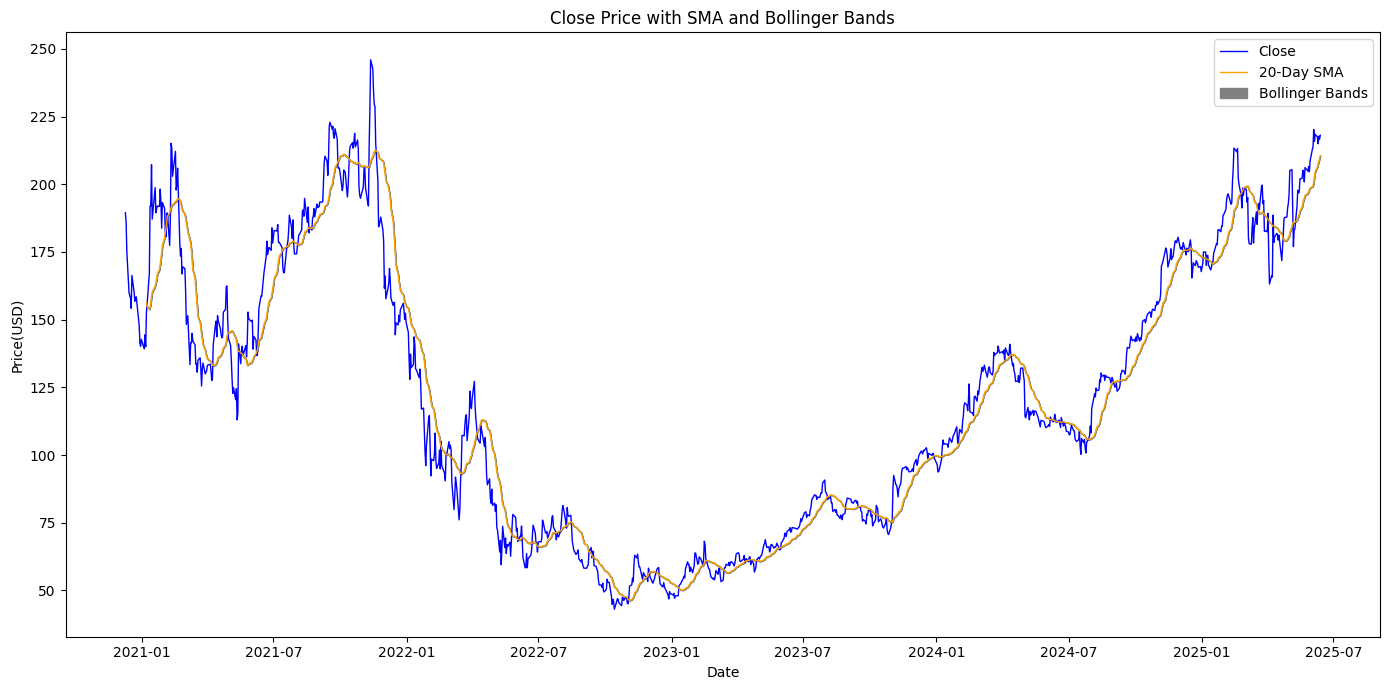

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Close"], label="Close", color="blue", linewidth=1)
plt.plot(df.index, df["20Day_SMA"], label="20-Day SMA", color="orange", linewidth=1)
plt.fill_between(df.index, df["Upper_BB"], df["Lower_BB"], color="gray", alpha=1, label="Bollinger Bands")
plt.title("Close Price with SMA and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.tight_layout()
plt.show()

**Volume and Volatility Subplots**

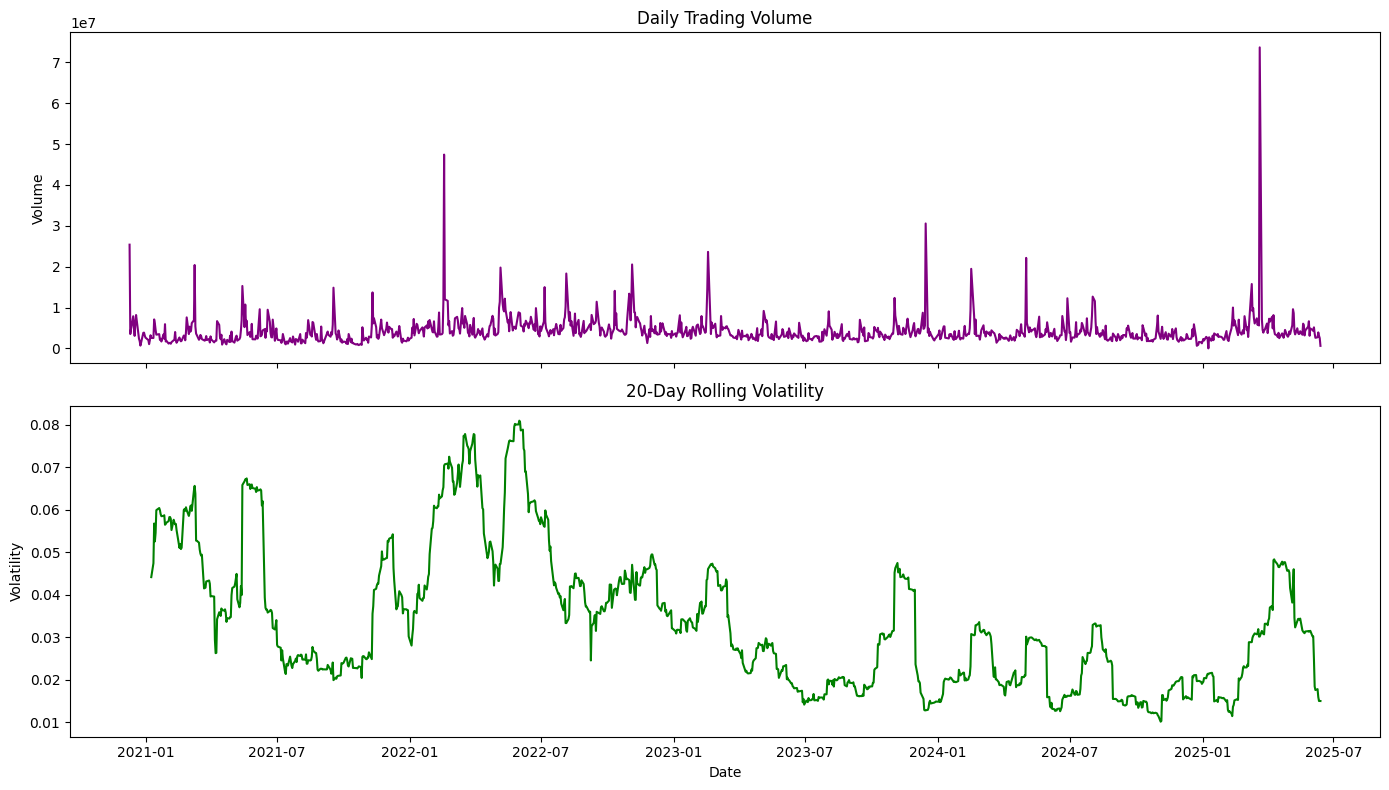

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
ax1.plot(df.index, df["Volume"], color="purple")
ax1.set_title("Daily Trading Volume")
ax1.set_ylabel("Volume")
ax2.plot(df.index, df["20Day_Volatility"], color="green")
ax2.set_title("20-Day Rolling Volatility")
ax2.set_ylabel("Volatility")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### Histogram Chart

**Histogram of Log Returns**

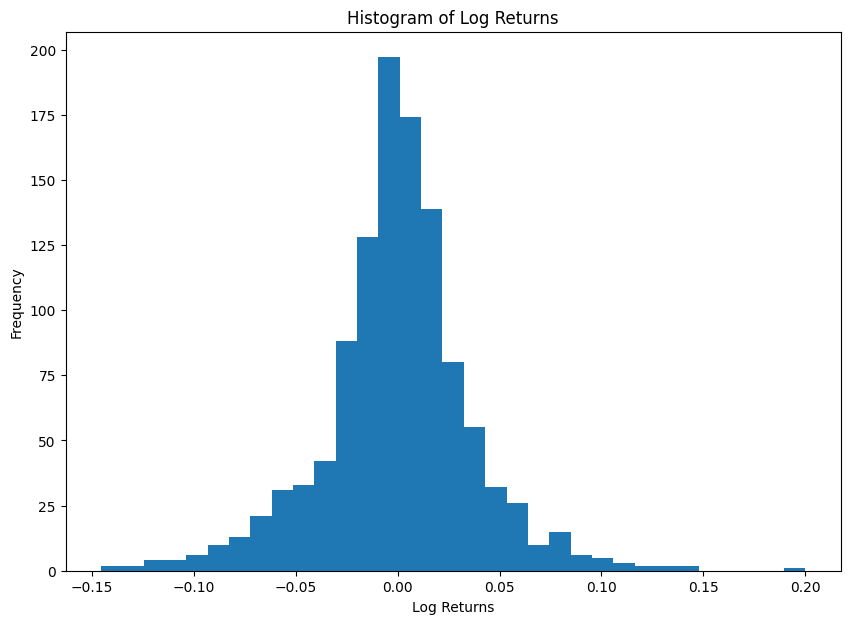

In [29]:
recommended_bins = int(np.sqrt(len(df.Log_Returns)))
recommended_bins # is 33

plt.figure(figsize=(10, 7))
plt.hist(df.Log_Returns, bins=33)
plt.title("Histogram of Log Returns")
plt.ylabel("Frequency")
plt.xlabel("Log Returns")
plt.show()

### Scatter Plot Chart

**Scatter Plot: Volume vs Daily Return**

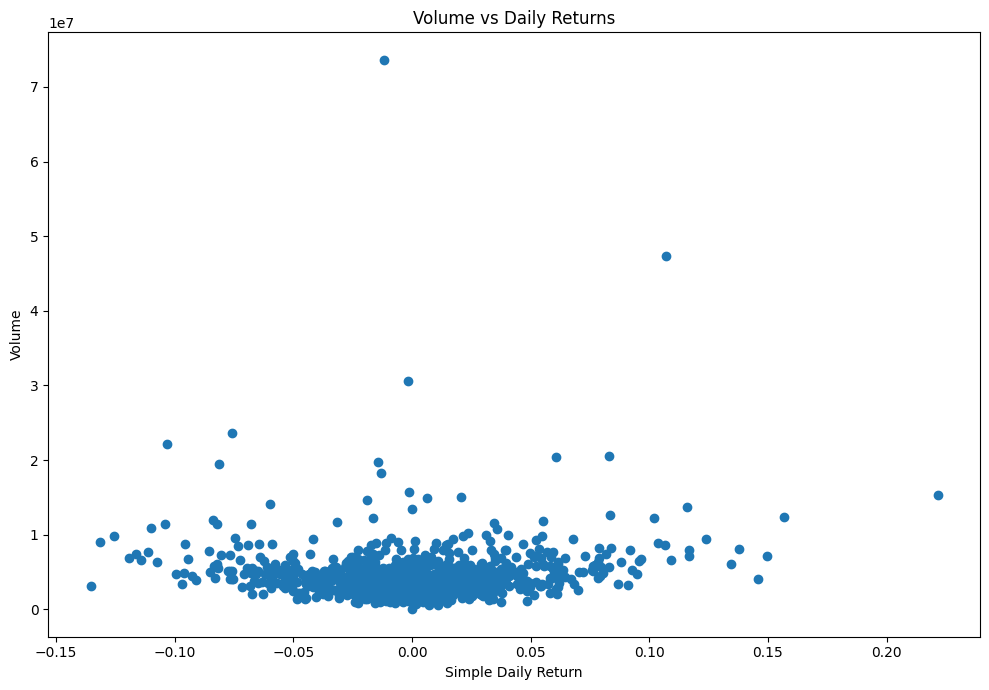

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(df.SimpleDailyReturns, df.Volume)
plt.title("Volume vs Daily Returns")
plt.ylabel("Volume")
plt.xlabel("Simple Daily Return")
plt.tight_layout()
plt.show()